# Data Analysis for "Does Geography Determine National Sporting Success?" 

## Setting up the notebook

Importing required packages

In [123]:
import matplotlib as mpl
import matplotlib.dates as md
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import os
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm

from scipy.stats import shapiro
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson

%config InlineBackend.figure_format='retina'
%matplotlib inline

Setting seed for reproducibility

In [124]:
np.random.seed(0)

Setting the Working Directory

In [125]:
os.getcwd()
os.chdir("c:\\Users\\vicks\\OneDrive\\Data Science (not uni)\\Portfolio\\Remastered MA Geo Diss")

Importing Sports Data

In [126]:
Data = pd.read_csv("Cumulative Data.csv")

## Data Cleaning and Pre-Processing

Checking the Contents of the Data

In [127]:
Data.head()

,Unnamed: 0,Country Code,Country,Overall Jokl Rank,Athletics,Cycling,Gymnastics,Shooting,Swimming,Coastline (Km) (2018),Temperature (1901-2016 [C]),GDP (US Billion Dollar),Elevation (Feet),Status of Women,Democracy Index,Population
0,1,USA,�United States,3592.91,1444.87,255.14,573.98,330.12,988.81,19924.0,7.00,21428.0,611.53,0.85,7.96,3.310027e+08
1,2,GBR,�Great Britain,2202.10,729.75,413.69,503.35,119.66,435.66,12429.0,8.50,2827.0,526.59,0.88,8.52,6.788601e+07
2,3,CHN,�China,1906.08,222.45,11.54,479.91,687.05,505.14,14500.0,6.39,14343.0,6005.63,0.73,2.26,1.439324e+09
3,4,ITA,�Italy,1828.25,288.53,413.02,205.08,484.06,437.56,7600.0,11.86,2001.0,1754.73,0.83,7.52,6.046183e+07
4,5,CAN,�Canada,1506.77,549.62,190.79,318.79,3.87,443.69,202080.0,-6.89,1736.0,1519.09,0.88,9.22,3.774215e+07


Removing Irrelevant Columns and Rows

In [128]:
SportData = Data.iloc[:190,3:]
SportData

,Overall Jokl Rank,Athletics,Cycling,Gymnastics,Shooting,Swimming,Coastline (Km) (2018),Temperature (1901-2016 [C]),GDP (US Billion Dollar),Elevation (Feet),Status of Women,Democracy Index,Population
0,3592.91,1444.87,255.14,573.98,330.12,988.81,19924.0,7.00,21428.00,611.53,0.85,7.96,3.310027e+08
1,2202.10,729.75,413.69,503.35,119.66,435.66,12429.0,8.50,2827.00,526.59,0.88,8.52,6.788601e+07
2,1906.08,222.45,11.54,479.91,687.05,505.14,14500.0,6.39,14343.00,6005.63,0.73,2.26,1.439324e+09
3,1828.25,288.53,413.02,205.08,484.06,437.56,7600.0,11.86,2001.00,1754.73,0.83,7.52,6.046183e+07
4,1506.77,549.62,190.79,318.79,3.87,443.69,202080.0,-6.89,1736.00,1519.09,0.88,9.22,3.774215e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,1.04,NaN,NaN,NaN,NaN,1.04,0.0,25.07,2.22,1967.08,0.51,1.32,4.829767e+06
186,0.57,0.57,NaN,NaN,NaN,NaN,24.0,28.10,47.27,36.98,NaN,NaN,3.871700e+04
187,0.52,NaN,NaN,NaN,0.00,0.52,0.0,11.03,3.15,6717.81,NaN,NaN,7.726500e+04
188,0.42,NaN,NaN,NaN,NaN,0.42,0.0,12.09,30.64,6901.26,0.72,5.28,2.913681e+07


Checking the Dimensions of the Data

In [129]:
print(SportData.shape)

(190, 13)


Checking missing values

In [130]:
missing_values_count = SportData.isnull().sum()
total_cells = np.product(SportData.shape)


total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100

print(percent_missing)

21.214574898785425


Visualising missing value locations - by column

In [131]:
print(SportData.isnull().sum())

Overall Jokl Rank                0
Athletics                       26
Cycling                        134
Gymnastics                     131
Shooting                       107
Swimming                        45
Coastline (Km) (2018)            2
Temperature (1901-2016 [C])      2
GDP (US Billion Dollar)          3
Elevation (Feet)                 2
Status of Women                 38
Democracy Index                 32
Population                       2
dtype: int64


In [132]:
percent_missing = SportData.isnull().sum() * 100 / len(SportData)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
print(missing_value_df)

                             percent_missing
Cycling                            70.526316
Gymnastics                         68.947368
Shooting                           56.315789
Swimming                           23.684211
Status of Women                    20.000000
Democracy Index                    16.842105
Athletics                          13.684211
GDP (US Billion Dollar)             1.578947
Coastline (Km) (2018)               1.052632
Temperature (1901-2016 [C])         1.052632
Elevation (Feet)                    1.052632
Population                          1.052632
Overall Jokl Rank                   0.000000


Missingno Matrix Plot Visualizing the Sparsity of Data

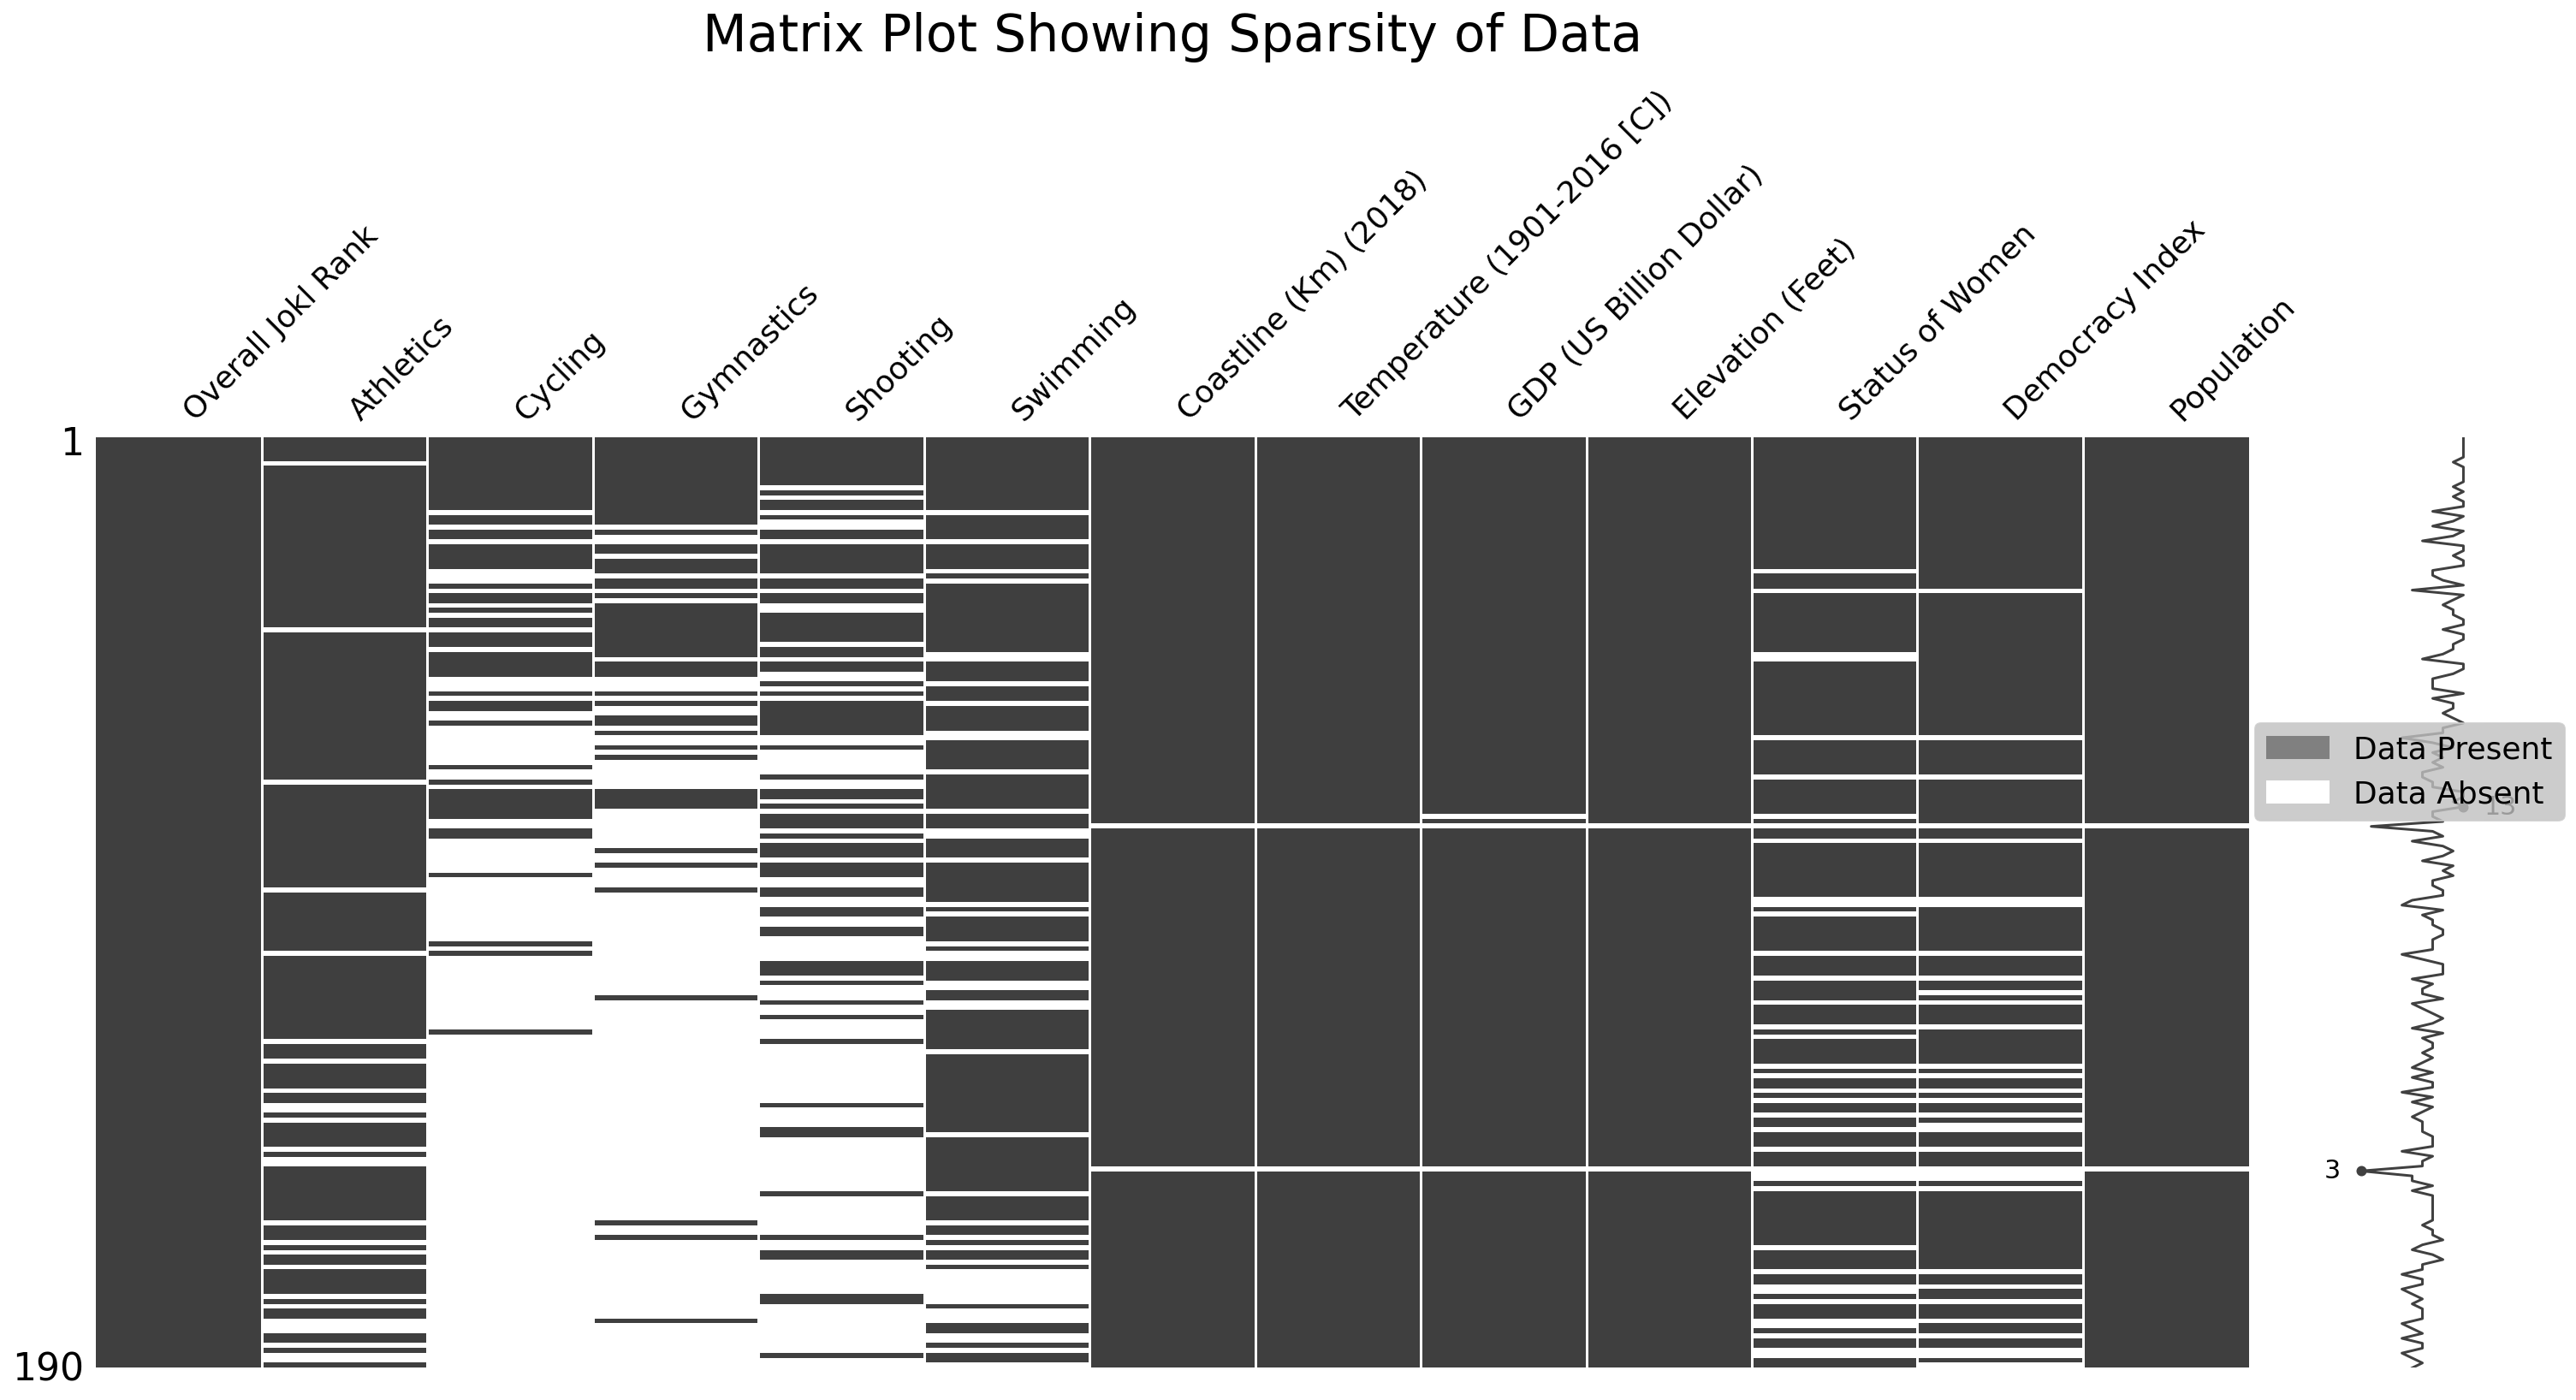

In [133]:
msno.matrix(SportData, fontsize=18)
gray_patch = mpatches.Patch(color='gray', label='Data Present')
white_patch = mpatches.Patch(color='white', label='Data Absent')
plt.legend(fontsize=18, bbox_to_anchor=(1.0, 0.7), borderaxespad=0.2, handles=[gray_patch, white_patch])
mpl.rcParams["legend.frameon"]=True
mpl.rcParams["legend.facecolor"]='#C0C0C0'
plt.title('Matrix Plot Showing Sparsity of Data', fontsize=30)
mpl.rcParams["axes.titlepad"]=20

plt.show()

_It is clear that there is a significant lack of data for Cycling and Gymnastics. For the sake of interest these sports will still be analysed however they are unlikely to have statistically significant results._

Building a dendrogram to view relationships of missing values between samples (excluding cognitive status column)

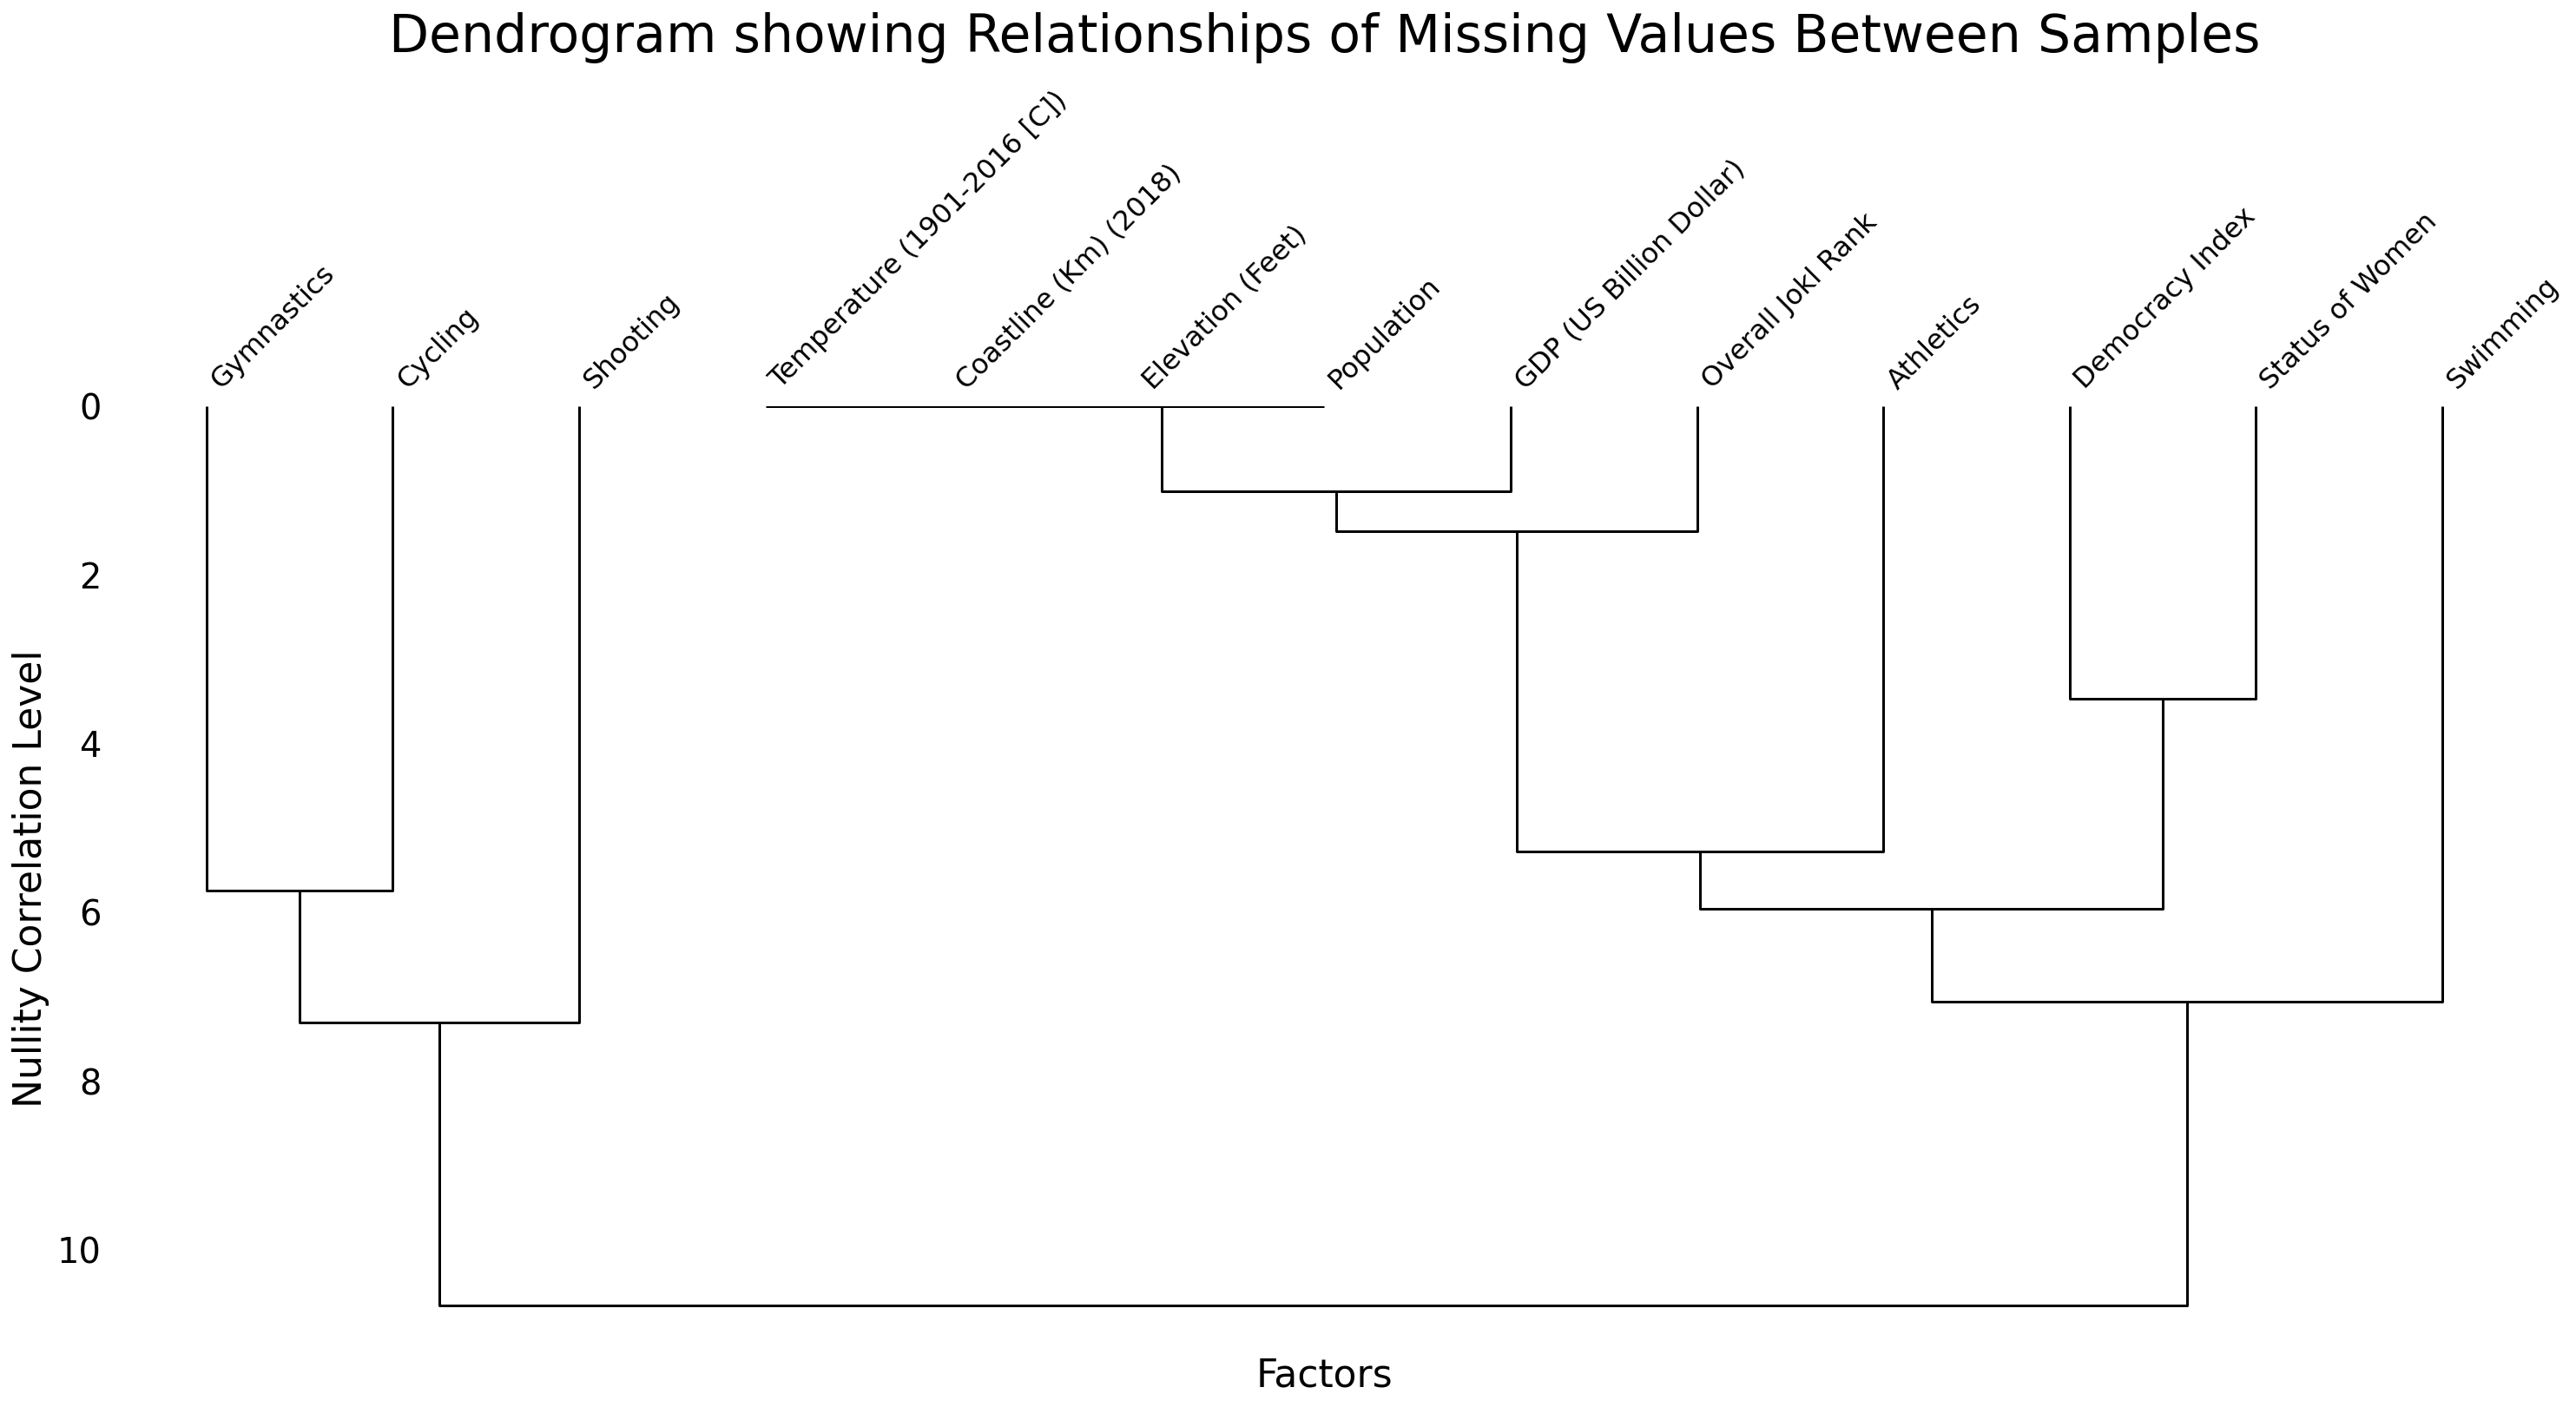

In [134]:
msno.dendrogram(SportData)
plt.title('Dendrogram showing Relationships of Missing Values Between Samples', fontsize=30)
mpl.rcParams["axes.titlepad"]=20
plt.ylabel('Nullity Correlation Level', fontsize=22)
plt.xlabel('Factors', fontsize=22)
plt.show()

_The Dendrogram indicates that there is likely a relationship between Temperature, stline, Elevation and Population. This is likely due to the fact that these are all features that together describe a country._

### Imputation

Converting the Data to Numeric

In [135]:
nSportData = SportData.iloc[:,:].astype(float)
nSportData

,Overall Jokl Rank,Athletics,Cycling,Gymnastics,Shooting,Swimming,Coastline (Km) (2018),Temperature (1901-2016 [C]),GDP (US Billion Dollar),Elevation (Feet),Status of Women,Democracy Index,Population
0,3592.91,1444.87,255.14,573.98,330.12,988.81,19924.0,7.00,21428.00,611.53,0.85,7.96,3.310027e+08
1,2202.10,729.75,413.69,503.35,119.66,435.66,12429.0,8.50,2827.00,526.59,0.88,8.52,6.788601e+07
2,1906.08,222.45,11.54,479.91,687.05,505.14,14500.0,6.39,14343.00,6005.63,0.73,2.26,1.439324e+09
3,1828.25,288.53,413.02,205.08,484.06,437.56,7600.0,11.86,2001.00,1754.73,0.83,7.52,6.046183e+07
4,1506.77,549.62,190.79,318.79,3.87,443.69,202080.0,-6.89,1736.00,1519.09,0.88,9.22,3.774215e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,1.04,NaN,NaN,NaN,NaN,1.04,0.0,25.07,2.22,1967.08,0.51,1.32,4.829767e+06
186,0.57,0.57,NaN,NaN,NaN,NaN,24.0,28.10,47.27,36.98,NaN,NaN,3.871700e+04
187,0.52,NaN,NaN,NaN,0.00,0.52,0.0,11.03,3.15,6717.81,NaN,NaN,7.726500e+04
188,0.42,NaN,NaN,NaN,NaN,0.42,0.0,12.09,30.64,6901.26,0.72,5.28,2.913681e+07


'Autoscaling' prior to Imputation

In [136]:
scalar = StandardScaler().fit(nSportData)
SportScSK = scalar.transform(nSportData)
SportScSK = pd.DataFrame(SportScSK, columns=nSportData.columns, index=nSportData.index)
SportScSK;

KNN Imputation Method

In [137]:
imputer = KNNImputer(n_neighbors=2)
After_imputation = imputer.fit_transform(SportScSK)
SportIm = pd.DataFrame(After_imputation, columns=SportScSK.columns, index=SportScSK.index)
SportIm

,Overall Jokl Rank,Athletics,Cycling,Gymnastics,Shooting,Swimming,Coastline (Km) (2018),Temperature (1901-2016 [C]),GDP (US Billion Dollar),Elevation (Feet),Status of Women,Democracy Index,Population
0,7.558384,7.935746,1.464145,3.330825,1.748549,6.960005,0.936007,-1.417942,10.690428,-0.642652,1.236152,1.090185,1.938201
1,4.436000,3.741921,2.950820,2.842430,0.179178,2.801816,0.493812,-1.237790,1.205943,-0.690958,1.524040,1.343526,0.181244
2,3.771431,0.766857,-0.820017,2.680346,4.410127,3.324117,0.615998,-1.491204,7.077849,2.425002,0.084599,-1.488464,9.338996
3,3.596702,1.154384,2.944537,0.779938,2.896458,2.816099,0.208907,-0.834250,0.784773,0.007492,1.044226,0.891132,0.131669
4,2.874976,2.685548,0.860755,1.566225,-0.684253,2.862180,11.682982,-3.086148,0.649652,-0.126518,1.524040,1.660202,-0.020041
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,-0.505405,-0.327606,-0.688181,-0.428951,-0.409691,-0.465348,-0.239484,0.752287,-0.234387,0.128256,-2.026581,-1.913715,-0.239813
186,-0.506460,-0.534359,-0.510961,-0.414845,-0.371698,-0.399046,-0.238068,1.116194,-0.211417,-0.969402,-0.539159,-0.936543,-0.271805
187,-0.506573,-0.422200,-0.909049,-0.529043,-0.713111,-0.469257,-0.239484,-0.933934,-0.233913,2.830023,-0.395215,0.162776,-0.271548
188,-0.506797,-0.479761,-0.909049,-0.529043,-0.470576,-0.470009,-0.239484,-0.806627,-0.219896,2.934352,-0.011364,-0.122232,-0.077503


Plot matrix to visualise the data during the various pre-processing stages

Text(0.5, 1.0, 'kNN Imputation')

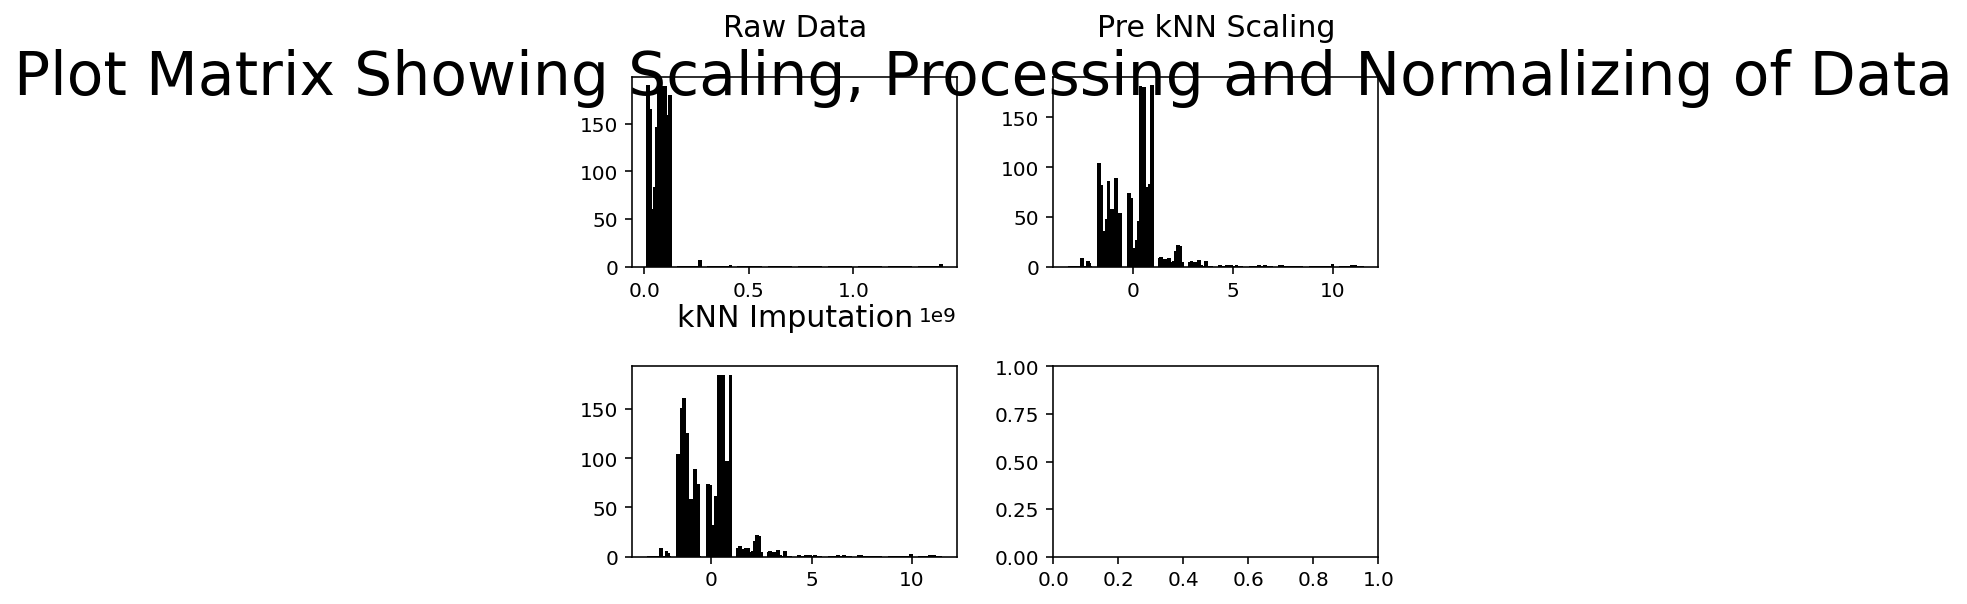

In [138]:
# Defining plot grids
fig, axs = plt.subplots(nrows=2, ncols=2)
fig.tight_layout(h_pad=3)
fig.suptitle('Plot Matrix Showing Scaling, Processing and Normalizing of Data', fontsize = 30)
plt.subplots_adjust(top=0.93)
plt.rcParams['figure.figsize'] = [20, 20]

# Histogram Creation
axs[0, 0].hist(nSportData, edgecolor='black')
axs[0, 1].hist(SportScSK, edgecolor='black')
axs[1, 0].hist(SportIm, edgecolor='black')

# Assigning Histogram Titles
axs[0, 0].set_title('Raw Data', fontsize = 15)
axs[0, 1].set_title('Pre kNN Scaling', fontsize = 15)
axs[1, 0].set_title('kNN Imputation', fontsize = 15)

Definig Individual Sport Datasets

In [139]:
GeoFeatures = SportIm.iloc[:,6:]
GeoFeatures;

In [140]:
OJR = SportIm.iloc[:,:1]
OJR;
OJRdf = OJR.join(GeoFeatures)
OJRdf

,Overall Jokl Rank,Coastline (Km) (2018),Temperature (1901-2016 [C]),GDP (US Billion Dollar),Elevation (Feet),Status of Women,Democracy Index,Population
0,7.558384,0.936007,-1.417942,10.690428,-0.642652,1.236152,1.090185,1.938201
1,4.436000,0.493812,-1.237790,1.205943,-0.690958,1.524040,1.343526,0.181244
2,3.771431,0.615998,-1.491204,7.077849,2.425002,0.084599,-1.488464,9.338996
3,3.596702,0.208907,-0.834250,0.784773,0.007492,1.044226,0.891132,0.131669
4,2.874976,11.682982,-3.086148,0.649652,-0.126518,1.524040,1.660202,-0.020041
...,...,...,...,...,...,...,...,...
185,-0.505405,-0.239484,0.752287,-0.234387,0.128256,-2.026581,-1.913715,-0.239813
186,-0.506460,-0.238068,1.116194,-0.211417,-0.969402,-0.539159,-0.936543,-0.271805
187,-0.506573,-0.239484,-0.933934,-0.233913,2.830023,-0.395215,0.162776,-0.271548
188,-0.506797,-0.239484,-0.806627,-0.219896,2.934352,-0.011364,-0.122232,-0.077503


In [141]:
Athletics = SportIm.iloc[:,1:2]
Athletics;
Athdf = Athletics.join(GeoFeatures)
Athdf;

In [142]:
Cycling = SportIm.iloc[:,2:3]
Cycling;
Cycdf = Cycling.join(GeoFeatures)
Cycdf;

In [143]:
Gymnastics = SportIm.iloc[:,3:4]
Gymnastics;
Gymdf = Gymnastics.join(GeoFeatures)
Gymdf;

In [144]:
Shooting = SportIm.iloc[:,4:5]
Shooting;
Shootdf = Shooting.join(GeoFeatures)
Shootdf;

In [145]:
Swimming = SportIm.iloc[:,5:6]
Swimming;
Swimdf = Swimming.join(GeoFeatures)
Swimdf;

## Data Analysis

### Multiple Linear Regression

Defining Features Array

In [146]:
x = GeoFeatures
x;

#### Overall Jokl Ranking

##### Machine Learning Approach

Spliting the Data

_OJR refers to the values typiocally described as 'y'_

In [147]:
x_train, x_test, OJR_train, OJR_test = train_test_split(x, OJR, test_size = 0.2, random_state = 42)

Building the model

In [148]:
OJRLR = LinearRegression()

Fitting the OJR Data

In [149]:
OJRLR.fit(x_train, OJR_train)

LinearRegression()

Testing model accuracy with r2

In [150]:
OJR_prediction =  OJRLR.predict(x_test)
OJR_prediction;

In [151]:
score=r2_score(OJR_test,OJR_prediction)
print('r2 socre is',score)
print('mean_sqrd_error is==',mean_squared_error(OJR_test,OJR_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(OJR_test,OJR_prediction)))

r2 socre is 0.34414126763540986
mean_sqrd_error is== 0.3666630369884536
root_mean_squared error of is== 0.6055270737039373


With the r2 score being only 0.34, it is clear that this model is not accurate enough to predict the Overall Jokl Rank - this is consistent with the original findings which found that only GDP had any significant impact on the sporting performances.

We can further explore this by looking at the individual features:

Creating a list of feature names

In [152]:
geofeats = x.columns
geofeats

Index(['Coastline (Km) (2018)', 'Temperature (1901-2016 [C])',
       'GDP (US Billion Dollar)', 'Elevation (Feet)', 'Status of Women',
       'Democracy Index', 'Population'],
      dtype='object')

Extracting coeficcients

In [153]:
model_coefficients = OJRLR.coef_[0]
model_coefficients;

Creating a dataframe of the features and their coefficients

In [154]:
coefficient_df = pd.DataFrame({"Geographical Features" : geofeats, "Coefficient": model_coefficients})
coefficient_df

,Geographical Features,Coefficient
0,Coastline (Km) (2018),0.131101
1,Temperature (1901-2016 [C]),-0.147050
2,GDP (US Billion Dollar),0.729090
3,Elevation (Feet),-0.102864
4,Status of Women,0.099579
5,Democracy Index,0.068417
6,Population,-0.060807


These coefficient results support the original finding that GDP was the only feature with strong relationship (coefficient of 0.73). There are very slight relationships showing for Coastline, Temperature and elevation but these are unlikly to be significant from a determanistic perspective.

We can seperate out GDP and compare it directly with a simple linear regression model:

In [155]:
GDP = x.iloc[:,2:3]
GDP;

Splitting the data

In [156]:
GDP_train, GDP_test, OJRslr_train, OJRslr_test = train_test_split(GDP, OJR, test_size = 0.2, random_state = 42)

Building the Model

In [157]:
OJRsLR = LinearRegression()

Fitting the OJR and GDP data

In [158]:
OJRsLR.fit(GDP_train, OJRslr_train)

LinearRegression()

Testing model accuracy with r2

In [159]:
OJRslr_prediction =  OJRsLR.predict(GDP_test)
OJRslr_prediction;

In [160]:
slrscore=r2_score(OJRslr_test,OJRslr_prediction)
print('r2 socre is',slrscore)
print('mean_sqrd_error is==',mean_squared_error(OJRslr_test,OJRslr_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(OJRslr_test,OJRslr_prediction)))

r2 socre is 0.17359393149908264
mean_sqrd_error is== 0.4620088807383455
root_mean_squared error of is== 0.6797123514681379


The r2 result indicates that whilst GDP has a strong relationship with the OJR scores, it cannot be used to predict them. Interestingly the model accuracy is much lower than it was when all the geographical features were included.

##### Statistics Approach

Adding a constant to the features array

In [161]:
xcon = sm.add_constant(x, prepend=False)

Fitting and summarising the model

In [162]:
statmLMmodel = sm.OLS(OJR, xcon).fit()
print(statmLMmodel.summary())

                            OLS Regression Results                            
Dep. Variable:      Overall Jokl Rank   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     66.03
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           1.22e-46
Time:                        18:15:07   Log-Likelihood:                -149.52
No. Observations:                 190   AIC:                             315.0
Df Residuals:                     182   BIC:                             341.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Coastline (Km) (20

In [163]:
print(statmLMmodel.f_pvalue())

TypeError: 'numpy.float64' object is not callable

##### Summary

Neither of the machine learning results (r2 of 0.344 for multiple regression model and 0.174 for GDP only) match the r2 result from the original report which was 0.719. The statsmodels approach however produced an r2 value of 0.717 which is much closer to the value found by the original report. Similarly the adjusted r2 in the original report was 0.705 in comparison to the stats models test which was 0.707.

The original testing did not take any action to address the missing data which was as high as 20% in at least one factor (Status of Women). It is possible that this has contributed to the cause of the difference however given the very low coefficient values of these two factors (Status of Women, Democracy Index), it is not likely these factors had much effect on the model.

The origninal report drew attention to the Durbin-Watson statistic which had a value of 2.162. The statsmodels test had a value of 1.532 which is quite different, however both values still fall between the critical values of > 1.5 and < 2.5 which allows us to assume that there is no first order autocorrelation in the dataset.

The F statistic in the statsmodels regression was 66.03 in comparison to the original report which had an F value of 51.664.